In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


#P15 DDA算法实现

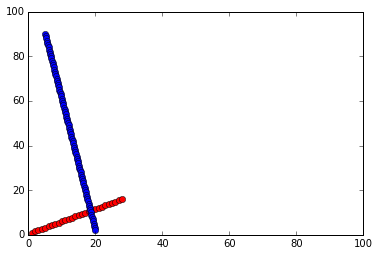

In [3]:
def line(l,r):
    px = []
    py = []
    x0,y0 = l
    x1,y1 = r
    dx = x1-x0
    dy = y1-y0
    steps = max(abs(dx), abs(dy))
    xi = dx/steps
    yi = dy/steps
    x = x0
    y = y0
    px.append(x)
    py.append(y)
    for i in xrange(steps):
        x += xi
        y += yi
        px.append(x)
        py.append(y)
    return px,py



px,py = line((1,1),(28,16))
plt.plot(px,py,'or')
px,py = line((5,90),(20,2))
plt.plot(array(px),array(py),'ob')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

#CYTHON优化版本

In [7]:
%%cython
from __future__ import division
import numpy as np
cimport numpy as np
DTYPE = np.int
ctypedef np.int_t DTYPE_t
cimport cython
def line3(l,r):
    cdef int x0,y0,x1,y1,dx,dy,steps,k
    cdef float xi,yi,x,y
    x0,y0 = l
    x1,y1 = r
    x = x0
    y = y0
    dx = x1-x0
    dy = y1-y0
    steps = max(abs(dx), abs(dy))
    cdef np.ndarray px = np.zeros(steps+1, dtype=DTYPE)
    cdef np.ndarray py = np.zeros(steps+1, dtype=DTYPE)
    xi = <float>dx/steps
    yi = <float>dy/steps
    px[0] = <int>x
    py[0] = <int>y
    cdef unsigned int i
    for i in range(steps):
        x += xi
        y += yi
        px[i+1] = <int>x
        py[i+1] = <int>y
    return px,py

# 中点画线算法

In [1]:
%%cython
def lineBres3(l,r):
    px = []
    py = []
    cdef int x0,y0,x1,y1
    cdef int dx,dy,p,twoDy,twoDyMinusDx,x,y
    x0,y0 = l
    x1,y1 = r
    if x1==x0 or y0==y1:
        assert(u'error')
        return [],[]
    cdef float m = abs(<float>(y1-y0)/(x1-x0))
    if m>1:
        y0,x0 = l
        y1,x1 = r
    dx = abs(x1-x0)
    dy = abs(y1-y0)
    cdef int cha = 0
    cdef float k = (y1-y0)/(x1-x0)
    if k>0:
        cha = 1
    elif k<0:
        cha = -1
        
    p = 2*dy-dx
    twoDy = 2*dy
    twoDyMinusDx = 2*(dy-dx)
    if x0>x1:
        x = x1
        y = y1
        x1 = x0
    else:
        x = x0
        y = y0
    px.append(x)
    py.append(y)
    while x<x1:
        x+=1
        if p<0:
            p+=twoDy
        else:
            y+=cha
            p+=twoDyMinusDx
        px.append(x)
        py.append(y)
    if m>1:return py,px
    return px,py


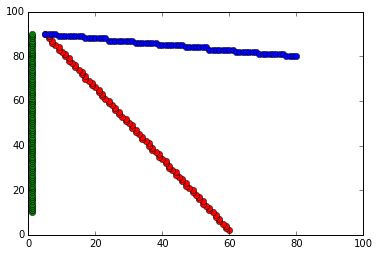

In [4]:
from matplotlib import pyplot as plt
px,py = lineBres3((5,90),(60,2))
plt.plot(px,py,'or')
px,py = lineBres3((5,90),(80,80))
plt.plot(px,py,'ob')
px,py = lineBres3((1,10),(10,90))
plt.plot(px,py,'og')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()